In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import do data set
df_dino = pd.read_csv("datasets/dinos.csv")

In [3]:
# vizualizando cabeçario do dataset
df_dino.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,Faerûn,<=50K


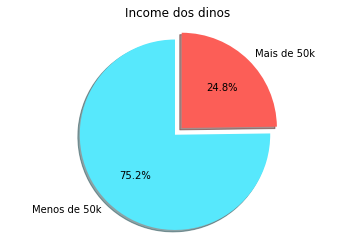

In [4]:
#  Vizualizando por centagem de pessoas que possuem income maior que 50k, este será o parametro para ser ou não um
# cliente de risco.

val_counts = df_dino.income.value_counts()

sizes = [val_counts[0], val_counts[1]]
colors = ['#57e8fc', '#fc5e57']
labels = ['Menos de 50k', 'Mais de 50k']


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
plt.title('Income dos dinos')
ax.axis('equal')
plt.show()

In [5]:
# Fazendo transformação de dados literais para numéricos

df_acounts = pd.read_csv("datasets/acounts_dinos.csv")
df_dino = pd.read_csv("datasets/dinos.csv")

df_dino['sex'] = df_dino['sex'].map({' Female':0, ' Male':1}).astype(int)
df_dino['marital-status'] = df_dino['marital-status'].map({
    ' Married-civ-spouse':0,
    ' Never-married':1,
    ' Divorced':2,
    ' Separated':3,
    ' Widowed':4,
    ' Married-spouse-absent':5,
    ' Married-AF-spouse':6 }).astype(int)

df_dino['workclass'] = df_dino['workclass'].map({
    ' Private':0,
    ' Self-emp-not-inc':1,
    ' Local-gov':2,
    ' State-gov':3,
    ' Self-emp-inc':4,
    ' Federal-gov':5,
    ' Without-pay':6
    }).astype(int)

df_dino['education_level'] = df_dino['education_level'].map({
    ' HS-grad': 0,
    ' Some-college': 1,
    ' Bachelors': 2,
    ' Masters': 3,
    ' Assoc-voc': 4,
    ' 11th' : 5,
    ' Assoc-acdm' : 6,
    ' 10th' : 7,
    ' 7th-8th' : 8,
    ' Prof-school':9,
    ' 9th':10,
    ' 12th':11,
    ' Doctorate':12,
    ' 5th-6th' :13,
    ' 1st-4th':14,
    ' Preschool':15    
}).astype(int)

df_dino['occupation'] = df_dino['occupation'].map({
    ' Craft-repair':0,
    ' Prof-specialty':1,
    ' Exec-managerial':2,
    ' Adm-clerical':3,
    ' Sales':4,                
    ' Other-service':5,
    ' Machine-op-inspct':6,
    ' Transport-moving':7,
    ' Handlers-cleaners':8,
    ' Farming-fishing' :9,
    ' Tech-support':10,
    ' Protective-serv':11,
    ' Priv-house-serv':12,
    ' Armed-Forces': 13    
}).astype(int)

df_dino['race'] = df_dino['race'].map({
   ' White':0,
    ' Black':1,
    ' Asian-Pac-Islander': 2,
    ' Amer-Indian-Eskimo':3,
    ' Other':4
}).astype(int) 

df_dino['income'] = df_dino['income'].map({
    '<=50K' : 0,
    '>50K' :1
})

In [6]:
# Criando nova feature de capital por hora, uma vez que 
# coluna capital gain == ganho de capital
# coluna capital loss == perca de capital
# coluna hours per week = horas de trabalho por semana
df_dino['capital_per_hour'] = (df_dino['capital-gain'] - df_dino['capital-loss']) / df_dino['hours-per-week']

In [7]:
df_features = df_dino[['age', 'workclass', 
                       'education_level', 
                       'education-num', 
                       'marital-status', 'occupation', 'race', 'sex', 'capital_per_hour']]

df_label = df_dino[['income']]

In [8]:
from sklearn.preprocessing import MinMaxScaler


# Faz escalonamento dos valores
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled_set = scaler.fit_transform(df_features)
y_scaled_set = scaler.fit_transform(df_label)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( x_scaled_set, y_scaled_set, test_size=0.33)


In [10]:
# Criando MLP
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


In [11]:
# Treinando modelo
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
30298/30298 [==============================] - 1s 28us/step - loss: 0.4694 - acc: 0.7786
Epoch 2/100
30298/30298 [==============================] - 1s 22us/step - loss: 0.4204 - acc: 0.8068
Epoch 3/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.4125 - acc: 0.8139
Epoch 4/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.4098 - acc: 0.8146: 0s - loss: 0.4125 - acc:
Epoch 5/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.4055 - acc: 0.8152
Epoch 6/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.4029 - acc: 0.8189
Epoch 7/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.3993 - acc: 0.8188
Epoch 8/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.3992 - acc: 0.8202
Epoch 9/100
30298/30298 [==============================] - 1s 21us/step - loss: 0.3991 - acc: 0.8186
Epoch 10/100
30298/30298 [==============================] - 1s 21

30298/30298 [==============================] - 1s 27us/step - loss: 0.3938 - acc: 0.8258
Epoch 82/100
30298/30298 [==============================] - 1s 27us/step - loss: 0.3906 - acc: 0.8250
Epoch 83/100
30298/30298 [==============================] - 1s 28us/step - loss: 0.3934 - acc: 0.8234
Epoch 84/100
30298/30298 [==============================] - 1s 29us/step - loss: 0.3954 - acc: 0.8229
Epoch 85/100
30298/30298 [==============================] - 1s 30us/step - loss: 0.3929 - acc: 0.8250
Epoch 86/100
30298/30298 [==============================] - 1s 30us/step - loss: 0.3928 - acc: 0.8230
Epoch 87/100
30298/30298 [==============================] - 1s 28us/step - loss: 0.3928 - acc: 0.8262
Epoch 88/100
30298/30298 [==============================] - 1s 27us/step - loss: 0.3937 - acc: 0.8267
Epoch 89/100
30298/30298 [==============================] - 1s 27us/step - loss: 0.3948 - acc: 0.8243
Epoch 90/100
30298/30298 [==============================] - 1s 28us/step - loss: 0.3947 - acc: 

In [12]:
# Testando modelo
score = model.evaluate(X_test, y_test)

print("Loss :",score[0], " Taxa de acerto:", score[1] )

14924/14924 [==============================] - 0s 11us/step
Loss : 0.36573632593865496  Taxa de acerto: 0.8371080139213067
